In [ ]:
# BERT를 활용해 토큰들을 태스크에 맞게 분류하는 모델

In [ ]:
import torch

device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
# torch.cuda.get_device_name(0)

# 데이터 불러오기

In [ ]:
!git clone https://github.com/kmounlp/NER.git

Cloning into 'NER'...
remote: Enumerating objects: 1770, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 1770 (delta 0), reused 42 (delta 0), pack-reused 1727 (from 1)
Receiving objects: 100% (1770/1770), 20.69 MiB | 9.43 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
import os
import glob

In [ ]:
file_list = []

for x in os.walk('/content/NER/'):
      for y in glob.glob(os.path.join(x[0], '*_NER.txt')):
            file_list.append(y)

In [ ]:
for file_path in file_list:
  print(file_path)

/content/NER/말뭉치 - 형태소_개체명/00867_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00760_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00114_NER.txt
/content/NER/말뭉치 - 형태소_개체명/32572_NER.txt
/content/NER/말뭉치 - 형태소_개체명/20159_NER.txt
/content/NER/말뭉치 - 형태소_개체명/10179_NER.txt
/content/NER/말뭉치 - 형태소_개체명/20139_NER.txt
/content/NER/말뭉치 - 형태소_개체명/32494_NER.txt
/content/NER/말뭉치 - 형태소_개체명/10013_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00824_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00716_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00150_NER.txt
/content/NER/말뭉치 - 형태소_개체명/32756_NER.txt
/content/NER/말뭉치 - 형태소_개체명/10166_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00642_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00626_NER.txt
/content/NER/말뭉치 - 형태소_개체명/10117_NER.txt
/content/NER/말뭉치 - 형태소_개체명/10049_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00223_NER.txt
/content/NER/말뭉치 - 형태소_개체명/32680_NER.txt
/content/NER/말뭉치 - 형태소_개체명/00726_NER.txt
/content/NER/말뭉치 - 형태소_개체명/32485_NER.txt
/content/NER/말뭉치 - 형태소_개체명/20074_NER.txt
/content/NER/말뭉치 - 형태소_개체명/32559_NER.txt
/content/NER/말뭉치

# 허깅페이스 트랜스포머

In [ ]:
!pip install transformers

In [ ]:
from pathlib import Path

In [ ]:
file_path = file_list[0]
file_path = Path(file_path)
raw_text = file_path.read_text().strip()

In [ ]:
print(raw_text[0:1000])

## 1
## 이에 앞서 만델라 ANC 의장은 이날 총선에서 「대규모 투표방해」가 있었다며 투표를 29일까지 연장할 것을 촉구했다.
## 이에 앞서 <만델라:PER> <ANC:ORG> 의장은 이날 총선에서 「대규모 투표방해」가 있었다며 투표를 <29일:DAT>까지 연장할 것을 촉구했다.
이	이	NP	O
에	에	JKB	O
_	_	_	O
앞서	앞서+어	VV+EC	O
_	_	_	O
만델라	만델라	NNP	B-PER
_	_	_	O
ANC	ANC	SL	B-ORG
_	_	_	O
의장	의장	NNG	O
은	은	JX	O
_	_	_	O
이날	이날	NNG	O
_	_	_	O
총선	총선	NNG	O
에서	에서	JKB	O
_	_	_	O
「	「	SS	O
대규모	대규모	NNG	O
_	_	_	O
투표	투표	NNG	O
방해	방해	NNG	O
」	」	SS	O
가	가	JKS	O
_	_	_	O
있	있	VA	O
었	었	EP	O
다며	다며	EC	O
_	_	_	O
투표	투표	NNG	O
를	를	JKO	O
_	_	_	O
29	29	SN	B-DAT
일	일	NNB	I-DAT
까지	까지	JX	O
_	_	_	O
연장할	연장하+ㄹ	VV+ETM	O
_	_	_	O
것	것	NNB	O
을	을	JKO	O
_	_	_	O
촉구	촉구하	VV	O
했	였	EP	O
다	다	EF	O
.	.	SF	O

## 2
## 헌법재판소가 박근혜 대통령 탄핵심판 사건을 심리한 지 두 달을 넘기면서 최종 변론기일이 점점 가시권에 들고 있다.
## <헌법재판소:ORG>가 <박근혜:PER> 대통령 탄핵심판 사건을 심리한 지 <두 달:MNY>을 넘기면서 최종 변론기일이 점점 가시권에 들고 있다.
헌법	헌법	NNG	B-ORG
재판소	재판소	NNG	I-ORG
가	가	JKS	O
_	_	_	O
박근혜	박근혜	NNP	B-PER
_	_	_	O
대통령	대통령	NNG	O
_	_	_	O
탄핵	탄핵	NNG	O
심판	심판	NNG	O
_	_	_	O
사건	사건	NNG	O
을	을	JKO	O
_	_	_	O
심리한	심리하+ㄴ	VV+ETM	O
_	_	_	O
지	지	NNB	O
_	_	_	O


# 데이터셋 전처리

In [ ]:
import re

In [ ]:
def read_file(file_list):
      token_docs = []
      tag_docs = []

      for file_path in file_list:
            file_path = Path(file_path)
            raw_text = file_path.read_text().strip()
            raw_docs = re.split(r'\n\t?\n', raw_text)

            for doc in raw_docs: # 이중 개행 문자 기준
                  tokens = []
                  tags = []

                  for line in doc.split('\n'): # 개행 문자 기준
                        if line[0:1] == "$" or line[0:1] == ";" or line[0:2] == "##":
                              continue
                        try:
                              token = line.split('\t')[0]
                              tag = line.split('\t')[3] # 2: pos, 3: ner

                              for i, syllable in enumerate(token): # 음절 단위로 잘라서
                                    tokens.append(syllable)
                                    modi_tag = tag
                                    if i > 0:
                                          if tag[0] == 'B':
                                                modi_tag = 'I' + tag[1:] # BIO tag를 부착할게요 :-)
                                    tags.append(modi_tag)
                        except:
                              print(line)

                  token_docs.append(tokens)
                  tag_docs.append(tags)

      return token_docs, tag_docs

In [ ]:
texts, tags = read_file(file_list[:])

In [ ]:
print(len(texts))
print(len(tags))

19263
19263


In [ ]:
print(texts[0], end ='\n\n')
print(tags[0])

['이', '에', '_', '앞', '서', '_', '만', '델', '라', '_', 'A', 'N', 'C', '_', '의', '장', '은', '_', '이', '날', '_', '총', '선', '에', '서', '_', '「', '대', '규', '모', '_', '투', '표', '방', '해', '」', '가', '_', '있', '었', '다', '며', '_', '투', '표', '를', '_', '2', '9', '일', '까', '지', '_', '연', '장', '할', '_', '것', '을', '_', '촉', '구', '했', '다', '.']

['O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'I-PER', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-DAT', 'I-DAT', 'I-DAT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
unique_tags = set(tag for doc in tags for tag in doc)
tag2id = {tag: id for id, tag in enumerate(unique_tags)}
id2tag = {id: tag for tag, id in tag2id.items()}

In [ ]:
  for i, tag in enumerate(unique_tags):
    print(tag) # 학습을 위한 label list

I-POH
I-DAT
B-PER
B-TIM
B-LOC
B-DUR
I-LOC
B-MNY
I-ORG
B-ORG
I-PER
I-PNT
I-MNY
B-POH
I-NOH
B-PNT
I-TIM
B-DAT
B-NOH
I-DUR
O


# EDA

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
texts_len = [len(x) for x in texts]

Text(0, 0.5, 'Probability')

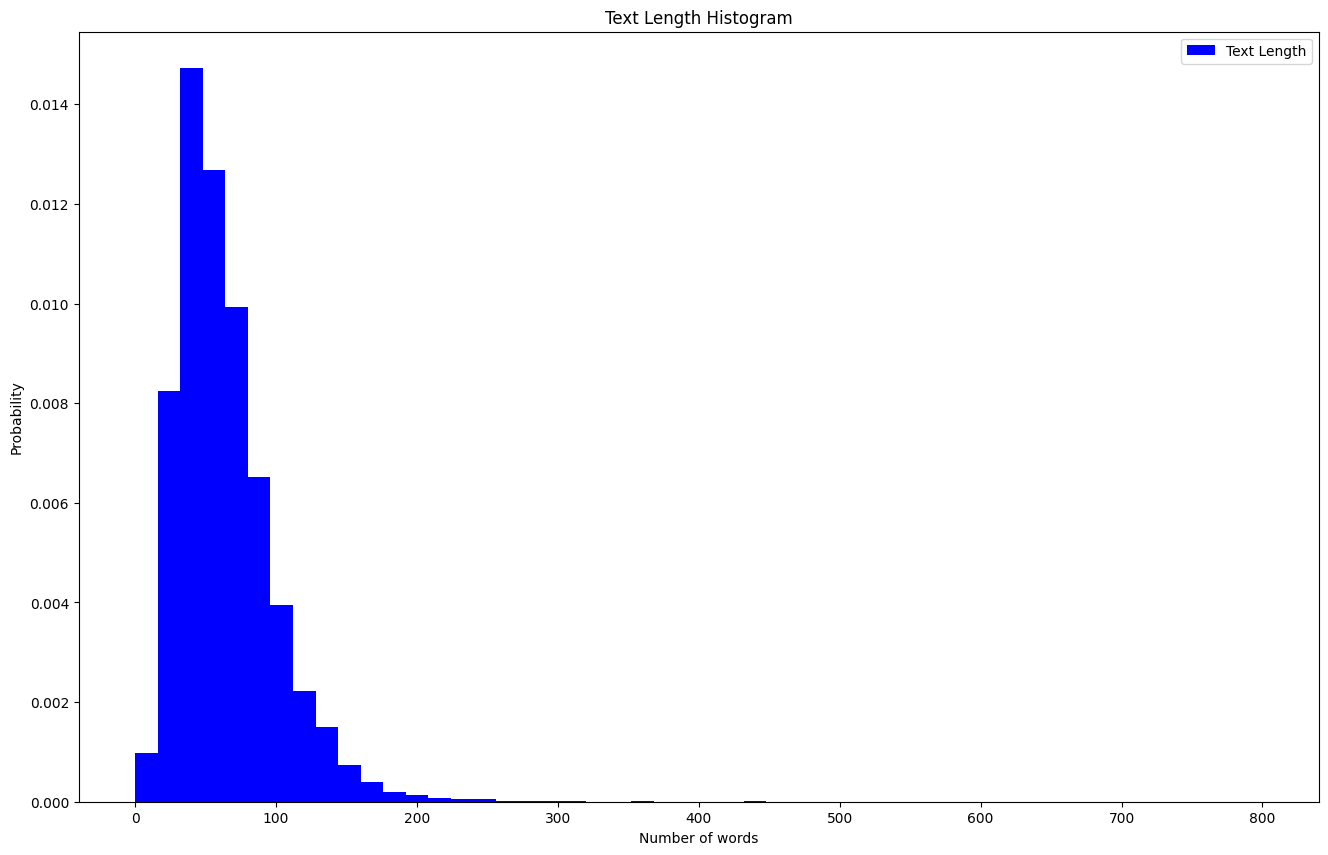

In [ ]:
# 문장 길이 히스토그램

plt.figure(figsize=(16,10))
plt.hist(texts_len, bins=50, range=[0,800],facecolor='b',density=True, label='Text Length')
plt.title('Text Length Histogram')
plt.legend()
plt.xlabel('Number of words')
plt.ylabel('Probability')

In [ ]:
# 각 NER 태그별 데이터에 포함된 갯수

In [ ]:
for tag in list(tag2id.keys()):
  globals()[tag] = 0

# tag_values = {tag: 0 for tag in tag2id.keys()}

In [ ]:
for tag in tags:
  for ner in tag:
    globals()[ner] += 1
    # counter[ner] = counter.get(ner, 0) + 1

In [ ]:
for tag in list(tag2id.keys()):
  print('{:>6} : {:7}'. format(tag, globals()[tag]))

 I-POH :   37156
 I-DAT :   14433
 B-PER :   13779
 B-TIM :     371
 B-LOC :    6313
 B-DUR :    1207
 I-LOC :   16537
 B-MNY :    1440
 I-ORG :   41320
 B-ORG :   13089
 I-PER :   26206
 I-PNT :    4613
 I-MNY :    6930
 B-POH :    6686
 I-NOH :   23967
 B-PNT :    1672
 I-TIM :    1876
 B-DAT :    5383
 B-NOH :   11051
 I-DUR :    4573
     O :  983746


# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_texts, test_texts, train_tags, test_tags = train_test_split(texts, tags, test_size=0.2)

In [ ]:
print('train 문장 : {:>6}'. format(len(train_texts)))
print(f'train 태그 : {len(train_tags):>6}')
print('test 문장 : {:>6}'. format(len(test_texts)))
print(f'test 태그 : {len(test_tags):>6}')


train 문장 :  15410
train 태그 :  15410
test 문장 :   3853
test 태그 :   3853


# BERT Tokenizer

In [ ]:
from transformers import AutoModel, AutoTokenizer, BertTokenizer

MODEL_NAME = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

In [ ]:
pad_token_id = tokenizer.pad_token_id # 0
cls_token_id = tokenizer.cls_token_id # 101
sep_token_id = tokenizer.sep_token_id # 102
pad_token_label_id = tag2id['O'] # tag2id['O']
cls_token_label_id = tag2id['O']
sep_token_label_id = tag2id['O']

In [ ]:
# 기존 tokenizer는 wordpiece tokenizer로 tokenizing로 반환
# 데이터를 음절 단위로 반환, tokenizer도 음절 tokenizer로 변경

def ner_tokenizer(sent, max_seq_length):
      pre_syllable = "_"
      input_ids = [pad_token_id] * (max_seq_length - 1)
      attention_mask = [0] * (max_seq_length - 1)
      token_type_ids = [0] * max_seq_length
      sent = sent[:max_seq_length-2]

      for i, syllable in enumerate(sent): # 문자 한개씩
            if syllable == '_':
                  pre_syllable = syllable
            if pre_syllable != "_":
                  syllable = '##' + syllable # 중간 음절에는 모두 prefix를 붙입니다.
                  # 이순신은 조선 -> [이, ##순, ##신, ##은, 조, ##선]
            pre_syllable = syllable

            input_ids[i] = (tokenizer.convert_tokens_to_ids(syllable))
            attention_mask[i] = 1

      input_ids = [cls_token_id] + input_ids
      input_ids[len(sent)+1] = sep_token_id
      attention_mask = [1] + attention_mask
      attention_mask[len(sent)+1] = 1

      return {"input_ids": input_ids,
                 "attention_mask": attention_mask,
                 "token_type_ids": token_type_ids}

In [ ]:
print(ner_tokenizer(train_texts[0],5))

{'input_ids': [101, 9376, 12692, 12508, 102], 'attention_mask': [1, 1, 1, 1, 1], 'token_type_ids': [0, 0, 0, 0, 0]}


In [ ]:
tokenized_train_sentences = []
tokenized_test_sentences = []

for text in train_texts: # 전체 데이터를 tokenizing 합니다.
      tokenized_train_sentences.append(ner_tokenizer(text, 128))
for text in test_texts:
      tokenized_test_sentences.append(ner_tokenizer(text, 128))

In [ ]:
def encode_tags(tags, max_seq_length):
      # label 역시 입력 token과 개수를 맞춰줌
      tags = tags[:max_seq_length-2]
      labels = [tag2id[tag] for tag in tags]
      labels = [tag2id['O']] + labels

      padding_length = max_seq_length - len(labels)
      labels = labels + ([pad_token_label_id] * padding_length)

      return labels

In [ ]:
encode_tags(train_tags[0],5)

[20, 13, 0, 0, 20]

In [ ]:
train_labels = []
test_labels = []

for tag in train_tags:
      train_labels.append(encode_tags(tag, 128))

for tag in test_tags:
      test_labels.append(encode_tags(tag, 128))

In [ ]:
len(train_labels), len(test_labels)

(15410, 3853)

# Token 데이터셋

In [ ]:
class TokenDataset(torch.utils.data.Dataset):
      def __init__(self, encodings, labels):
            self.encodings = encodings
            self.labels = labels

      def __getitem__(self, idx):
            item = {key: torch.tensor(val) for key, val in self.encodings[idx].items()}
            item['labels'] = torch.tensor(self.labels[idx])
            return item

      def __len__(self):
            return len(self.labels)

train_dataset = TokenDataset(tokenized_train_sentences, train_labels)
test_dataset = TokenDataset(tokenized_test_sentences, test_labels)

In [ ]:
from transformers import BertForTokenClassification, Trainer, TrainingArguments

training_args = TrainingArguments(
      output_dir='./results', # output directory
      num_train_epochs=5, # total number of training epochs
      per_device_train_batch_size=8, # batch size per device during training
      per_device_eval_batch_size=64, # batch size for evaluation
      logging_dir='./logs', # directory for storing logs
      logging_steps=100,
      learning_rate=3e-5,
      save_total_limit=5
)

# BertForTokenClassification

In [ ]:
model = BertForTokenClassification.from_pretrained(MODEL_NAME, num_labels=len(unique_tags))
model.to(device)

trainer = Trainer(
      model=model, # the instantiated Transformers model to be trained
      args=training_args, # training arguments, defined above
      train_dataset=train_dataset, # training dataset
      eval_dataset=test_dataset # evaluation dataset
)

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jeongrak5 (jeongrak5-not) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
100,0.369900
200,0.168600
300,0.139800
400,0.124200
500,0.116100
600,0.114600
700,0.111500
800,0.105800
900,0.097400
1000,0.094900


TrainOutput(global_step=9635, training_loss=0.055346544325877545, metrics={'train_runtime': 3188.5821, 'train_samples_per_second': 24.164, 'train_steps_per_second': 3.022, 'total_flos': 5034093373785600.0, 'train_loss': 0.055346544325877545, 'epoch': 5.0})

# new data inference

In [ ]:
def ner_inference(text):
  model.eval()
  text = text.replace(' ','_')

  predictions, true_labels = [], []

  tokenized_sent = ner_tokenizer(text,len(text)+2)
  input_ids = torch.tensor(tokenized_sent['input_ids']).unsqueeze(0).to(device)
  attention_mask = torch.tensor(tokenized_sent['attention_mask']).unsqueeze(0).to(device)
  token_type_ids = torch.tensor(tokenized_sent['token_type_ids']).unsqueeze(0).to(device)

  with torch.no_grad():
    outputs= model(
        input_ids = input_ids,
        attention_mask = attention_mask,
        token_type_ids = token_type_ids)

    logits = outputs['logits']
    logits = logits.detach().cpu().numpy()
    label_ids = token_type_ids.cpu().numpy()

    predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
    true_labels.append(label_ids)

    pred_tags = [list(tag2id.keys())[p_i] for p in predictions for p_i in p]

    print('{}\t{}'.format('TOKEN','TAG'))
    print('==============')

    for i, tag in enumerate(pred_tags):
      print('{:^5}\t{:^5}'.format(tokenizer.convert_ids_to_tokens(tokenized_sent['input_ids'][i]),tag))


In [ ]:
text = '이순신은 조선 중기 무신이다'

In [ ]:
ner_inference(text)

TOKEN	TAG
[CLS]	  O  
  이  	B-PER
 ##순 	I-PER
 ##신 	I-PER
 ##은 	  O  
  _  	  O  
  조  	B-ORG
 ##선 	I-ORG
  _  	  O  
  중  	  O  
 ##기 	  O  
  _  	  O  
  무  	  O  
 ##신 	  O  
 ##이 	  O  
 ##다 	  O  
[SEP]	  O  
